In [2]:
require(ggplot2)
require(data.table)
require(Hmisc)
require(ggthemes)
require(gridExtra)
require(grid)
require(lattice)
require(scales)
require(RColorBrewer)

Loading required package: ggplot2
Loading required package: data.table
Loading required package: Hmisc
Loading required package: lattice
Loading required package: survival
Loading required package: Formula

Attaching package: ‘Hmisc’

The following objects are masked from ‘package:base’:

    format.pval, round.POSIXt, trunc.POSIXt, units

Loading required package: ggthemes
Loading required package: gridExtra

Attaching package: ‘gridExtra’

The following object is masked from ‘package:Hmisc’:

    combine

Loading required package: grid
Loading required package: scales
Loading required package: RColorBrewer


In [3]:
# install.packages('bit64')

In [4]:
directory = "/mnt/sdb1/baseerat/numerical-evals/12-24-2017/logs-1M/"
blues = brewer.pal(n = 6, "Blues")[4:6]
plotTheme <- theme_hc() + theme(legend.title=element_blank(), 
                                legend.position="none", 
                                legend.text=element_text(size=8))

In [5]:
switchUpdateCount <- fread(paste(directory, "switch_update_count.csv", sep="/"), sep=",", header=TRUE)

Read 17088456 rows and 18 (of 18) columns from 1.828 GB file in 00:00:31


,updates,switch,event,groupSizeDist,placementDist,placementNumHostsPerLeaf,seed,podsAlgorithm,podsNumBitmaps,podsNumNodesPerBitmap,podsRedundancyPerBitmap,podsNumRules,leafsAlgorithm,leafsNumBitmaps,leafsNumNodesPerBitmap,leafsRedundancyPerBitmap,leafsNumRules,numEvents
1,1,virtual,join,uniform,colocate-uniform,uniform,0,random-fuzzy-match,2,3,6,64000,exact-match,30,3,0,64000,1000000
2,1941,virtual,join,uniform,colocate-uniform,uniform,0,random-fuzzy-match,2,3,6,64000,exact-match,30,3,0,64000,1000000
3,1942,virtual,join,uniform,colocate-uniform,uniform,0,random-fuzzy-match,2,3,6,64000,exact-match,30,3,0,64000,1000000
4,2029,virtual,join,uniform,colocate-uniform,uniform,0,random-fuzzy-match,2,3,6,64000,exact-match,30,3,0,64000,1000000
5,2027,virtual,join,uniform,colocate-uniform,uniform,0,random-fuzzy-match,2,3,6,64000,exact-match,30,3,0,64000,1000000
6,2028,virtual,join,uniform,colocate-uniform,uniform,0,random-fuzzy-match,2,3,6,64000,exact-match,30,3,0,64000,1000000


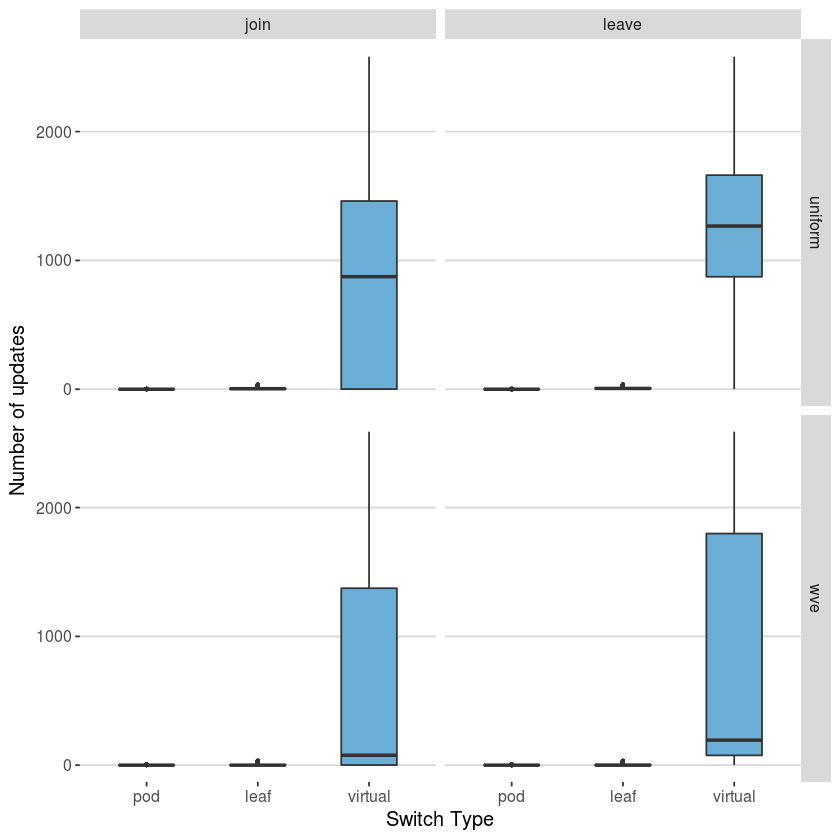

In [10]:
p1 <- ggplot(switchUpdateCount[leafsAlgorithm != "exact-match"]) +
   geom_boxplot(aes(y=updates, x=factor(switch, levels=c('pod','leaf','virtual')), 
                    fill=interaction(leafsAlgorithm, leafsNumBitmaps, leafsNumNodesPerBitmap, leafsRedundancyPerBitmap,
                                     leafsNumRules, placementNumHostsPerLeaf)),
                outlier.size=0.5, width=0.5) +
   facet_grid(groupSizeDist ~ factor(event)) +
   xlab("Switch Type") +
   scale_fill_manual(values=blues) +
   ylab("Number of updates") +
   plotTheme
p1

In [11]:
# ggsave(plt, file="switch_update_count.pdf", height=5, width=7)
ggsave(p1, file="switch_update_count.jpg", height=2, width=4)

In [9]:
switchUpdateCountNormalized <- fread(paste(directory, "switch_update_count_normalized.csv", sep="/"), sep=",", header=TRUE)

Read 17088456 rows and 18 (of 18) columns from 1.978 GB file in 00:00:28


In [37]:
(switchUpdateCountNormalized)

,updates,switch,event,groupSizeDist,placementDist,placementNumHostsPerLeaf,seed,podsAlgorithm,podsNumBitmaps,podsNumNodesPerBitmap,podsRedundancyPerBitmap,podsNumRules,leafsAlgorithm,leafsNumBitmaps,leafsNumNodesPerBitmap,leafsRedundancyPerBitmap,leafsNumRules,numEvents
1,0.000259470679813181,virtual,join,uniform,colocate-uniform,uniform,0,random-fuzzy-match,2,3,6,64000,exact-match,30,3,0,64000,1000000
2,0.503501945525292,virtual,join,uniform,colocate-uniform,uniform,0,random-fuzzy-match,2,3,6,64000,exact-match,30,3,0,64000,1000000
3,0.503630705394191,virtual,join,uniform,colocate-uniform,uniform,0,random-fuzzy-match,2,3,6,64000,exact-match,30,3,0,64000,1000000
4,0.523342790817642,virtual,join,uniform,colocate-uniform,uniform,0,random-fuzzy-match,2,3,6,64000,exact-match,30,3,0,64000,1000000
5,0.52296181630547,virtual,join,uniform,colocate-uniform,uniform,0,random-fuzzy-match,2,3,6,64000,exact-match,30,3,0,64000,1000000
6,0.523084859427392,virtual,join,uniform,colocate-uniform,uniform,0,random-fuzzy-match,2,3,6,64000,exact-match,30,3,0,64000,1000000
7,0.482409231635238,virtual,join,uniform,colocate-uniform,uniform,0,random-fuzzy-match,2,3,6,64000,exact-match,30,3,0,64000,1000000
8,0.00028137310073157,virtual,join,uniform,colocate-uniform,uniform,0,random-fuzzy-match,2,3,6,64000,exact-match,30,3,0,64000,1000000
9,0.482700421940928,virtual,join,uniform,colocate-uniform,uniform,0,random-fuzzy-match,2,3,6,64000,exact-match,30,3,0,64000,1000000
10,0.000419639110365086,virtual,join,uniform,colocate-uniform,uniform,0,random-fuzzy-match,2,3,6,64000,exact-match,30,3,0,64000,1000000


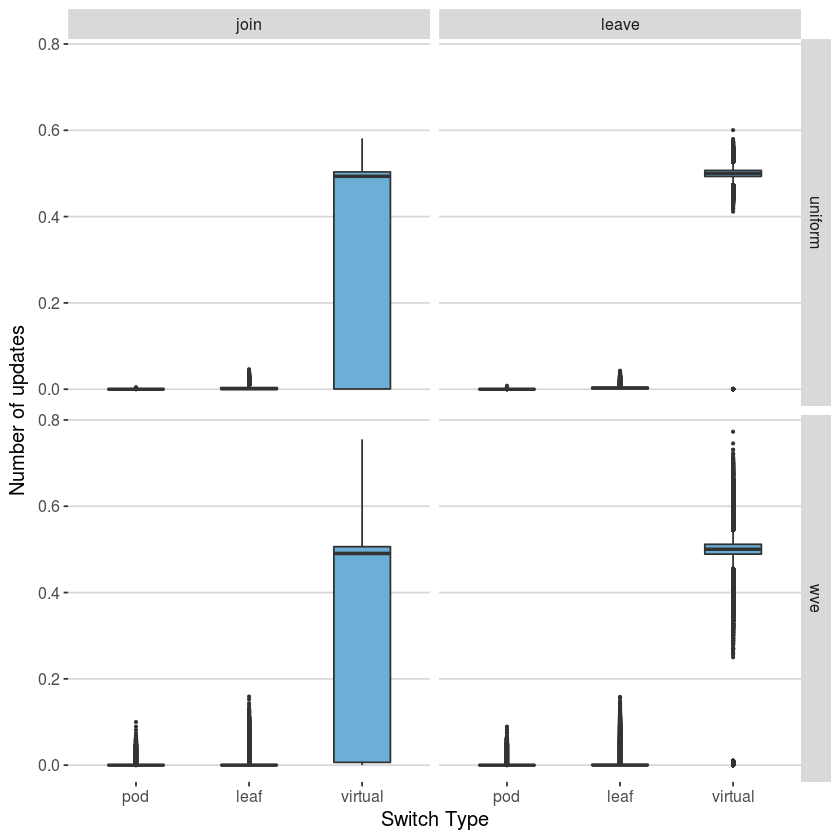

In [35]:
p2 <- ggplot(switchUpdateCountNormalized[leafsAlgorithm != "exact-match"]) +
   geom_boxplot(aes(y=updates, x=factor(switch, levels=c('pod','leaf','virtual')), 
                    fill=interaction(leafsAlgorithm, leafsNumBitmaps, leafsNumNodesPerBitmap, leafsRedundancyPerBitmap,
                                     leafsNumRules, placementNumHostsPerLeaf)),
                outlier.size=0.5, width=0.5) +
   facet_grid(groupSizeDist ~ factor(event)) +
   xlab("Switch Type") +
   scale_fill_manual(values=blues) +
   ylab("Number of updates") +
   plotTheme
p2

In [39]:
ggsave(p2, file="switch_update_count_normalized.pdf", height=2, width=4)
# ggsave(p2, file="switch_update_count_normalized.jpg", height=2, width=4)